In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use("ggplot")

In [2]:
# Read CSV from GitHub
url = "https://raw.githubusercontent.com/NIVANorge/teotil2/main/data/core_input_data/regine_fysone.csv"
df = pd.read_csv(url, sep=";")
df.head()

,regine,fylke_sone
0,001.10,1_1
1,001.1A1,1_1
2,001.1A20,1_1
3,001.1A2A,1_1
4,001.1A2B,1_1


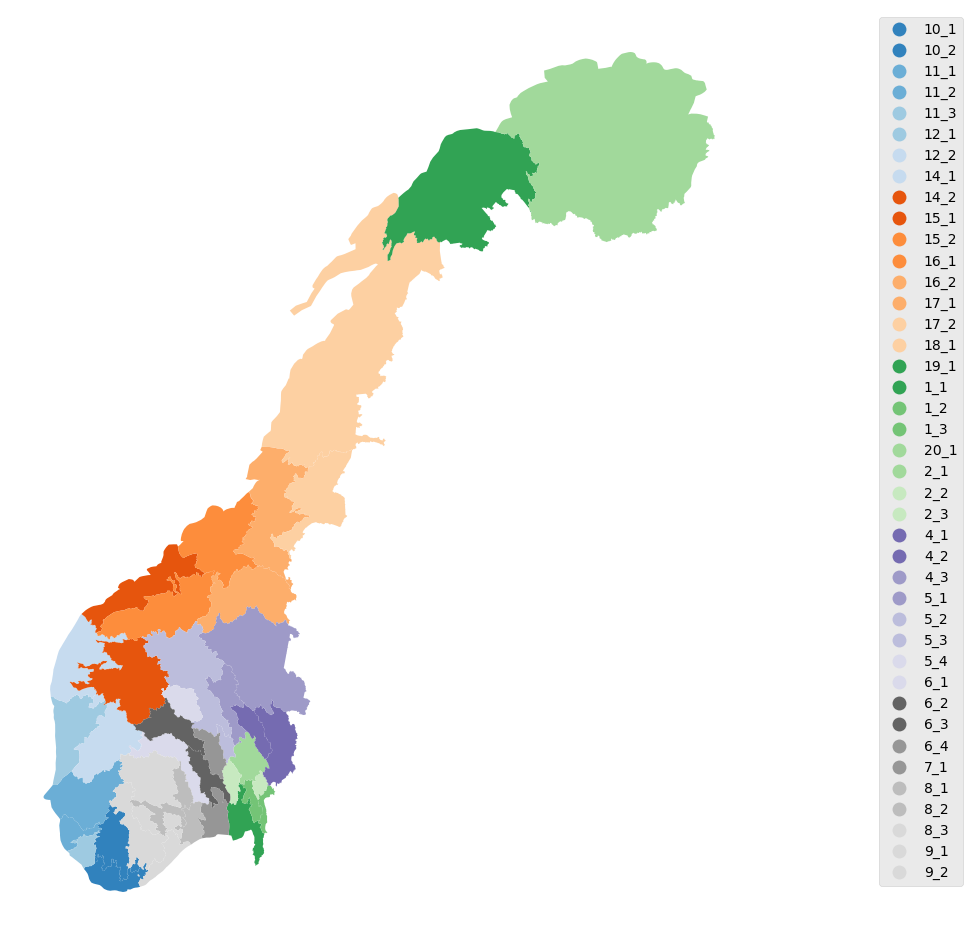

In [3]:
# Spatial data needs downloading locally first
gdf = gpd.read_file(r"../data/core_input_data/gis/reg_minste_f_wgs84.shp")
gdf = (
    gdf.merge(df, left_on="VASSDRAGNR", right_on="regine", how="left")
    .dissolve(by="fylke_sone")
    .reset_index()
).to_crs("epsg:25833")

# Plot
ax = gdf.plot(
    column="fylke_sone",
    categorical=True,
    legend=True,
    cmap="tab20c",
    figsize=(12, 12),
    legend_kwds={"bbox_to_anchor": (1.3, 1)},
)
ax.axis("off");